In [1]:
import rasterio
from rasterio.coords import BoundingBox

In [2]:
import matplotlib.pyplot as plt

In [16]:
global_path = "C:\\Phython programming\\Nightlights_Project\\notebooks\\global\\global_2022_vnl.tif"

In [17]:
from pathlib import Path

In [18]:
base = Path(r"C:/Users/Startklar")

In [9]:
import os

In [ ]:
os.path.exists("global_2022_vnl.tif")

False

: 

In [21]:
os.path.exists(global_path)

True

In [12]:
os.getcwd()

'c:\\Phython programming\\Nightlights_Project\\notebooks'

In [40]:
from pathlib import Path

folder = Path("../data_raw/global")
print("Folder exists:", folder.exists())
print("Contents:")
for p in folder.glob("*"):
    print("  -", p.name)


Folder exists: True
Contents:
  - 2022


In [22]:
import os
import rasterio

print("path:", global_path)
print("Exists:", os.path.exists(global_path))

with rasterio.open(global_path) as src:
    print("Opened OK")
    print("Size:", src.width, "x", src.height)


path: C:\Phython programming\Nightlights_Project\notebooks\global\global_2022_vnl.tif
Exists: True
Opened OK
Size: 86401 x 33601


In [27]:
pip install rioxarray

     ---------------------------------------- 62.2/62.2 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 6.3/6.3 MB 13.5 MB/s eta 0:00:00
     --------------------------------------- 11.3/11.3 MB 13.9 MB/s eta 0:00:00
     -------------------------------------- 509.2/509.2 kB 8.0 MB/s eta 0:00:00
     -------------------------------------- 347.8/347.8 kB 7.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import rioxarray as rio

In [29]:
night_data = rio.open_rasterio(global_path)

In [30]:
night_data

<xarray.DataArray (band: 1, y: 33601, x: 86401)> Size: 12GB
[2903160001 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 269kB 75.0 75.0 74.99 74.99 ... -64.99 -65.0 -65.0
  * x            (x) float64 691kB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_DOCUMENTNAME:      ./VNL_v22_npp-j01_2022_global_vcmslcfg_c202303...
    TIFFTAG_IMAGEDESCRIPTION:  IDL TIFF file
    TIFFTAG_SOFTWARE:          IDL 8.7.2, Harris Geospatial Solutions, Inc.
    TIFFTAG_DATETIME:          2023:06:30 13:03:16
    TIFFTAG_XRESOLUTION:       100
    TIFFTAG_YRESOLUTION:       100
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    AREA_OR_POINT:             Area
    scale_factor:              1.0
    add_offset:                0.0

In [32]:
import numpy as np

In [36]:
import numpy as np
import matplotlib.pyplot as plt

da = night_data.squeeze()          # drop band dimension
da = da.rio.write_crs("EPSG:4326") # make sure CRS is lat/lon



In [ ]:
berlin = da.sel(
    x=slice(12.8, 13.8),   # lon range
    y=slice(52.7, 52.3)    # lat range (note: 52.7 -> 52.3, not reversed)
)

print(berlin.shape)  # just to see how small it is

(96, 240)


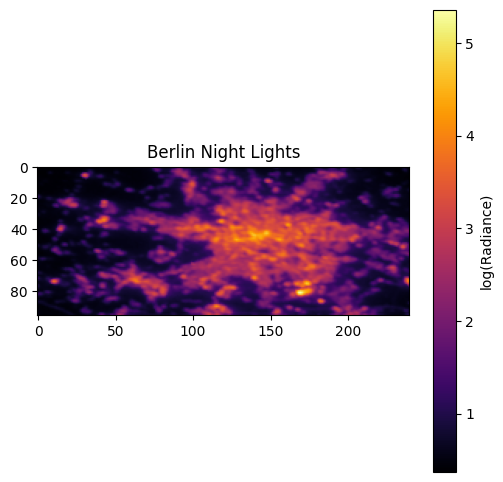

In [38]:
plt.figure(figsize=(6, 6))
plt.imshow(np.log1p(berlin.values), cmap="inferno")
plt.colorbar(label="log(Radiance)")
plt.title("Berlin Night Lights")
plt.show()


In [40]:
plt.savefig("berlin_nightlights.png", dpi=300, bbox_inches="tight")
plt.show()


<Figure size 640x480 with 0 Axes>

In [42]:
print("Berlin:", float(berlin.min()), float(berlin.max()), float(berlin.mean()))


Berlin: 0.4488513171672821 211.17788696289062 6.558535575866699


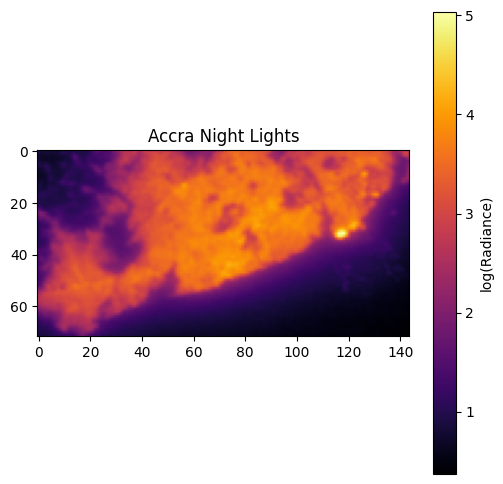

In [39]:
accra = da.sel(
    x=slice(-0.5, 0.1),   # lon range
    y=slice(5.75, 5.45)   # lat range (again: max -> min)
)

plt.figure(figsize=(6, 6))
plt.imshow(np.log1p(accra.values), cmap="inferno")
plt.colorbar(label="log(Radiance)")
plt.title("Accra Night Lights")
plt.show()


In [ ]:
plt.savefig("accra_nightlights.png", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
print("Accra:", float(accra.min()), float(accra.max()), float(accra.mean()))

Accra: 0.4509829580783844 152.45138549804688 15.430272102355957


In [ ]:
### i am saving the plots as final pngs
plt.savefig("berlin_nightlights.png", dpi=300, bbox_inches="tight")
plt.savefig("accra_nightlights.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

In [ ]:
## now we create a nighttime light * population hotspot analysis
global_pop_path = "C:\\Phython programming\\Nightlights_Project\\notebooks\\global\\global_pop.tif"

In [50]:
os.path.exists(global_pop_path)

True

In [48]:
os.getcwd()

'c:\\Phython programming\\Nightlights_Project\\notebooks'

In [55]:
pop = rio.open_rasterio(global_pop_path)

In [56]:
pop

<xarray.DataArray (band: 1, y: 180000, x: 360820)> Size: 520GB
[64947600000 values with dtype=float64]
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 1MB 9e+06 9e+06 9e+06 ... -9e+06 -9e+06 -9e+06
  * x            (x) float64 3MB -1.804e+07 -1.804e+07 ... 1.804e+07 1.804e+07
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        111627.53125
    STATISTICS_MEAN:           0.62104742656734
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         11.316912181764
    STATISTICS_VALID_PERCENT:  21.19
    _FillValue:                -200.0
    scale_factor:              1.0
    add_offset:                0.0

In [58]:
berlin_da = berlin
accra_da  = accra

In [ ]:
### due to memory space, we do the clipping for the population in QGIS